# WeatherPy
### 
### Observations and Trends:
- The warmest temperatures can be found in the latitude band of -10&deg; to 40&deg;, relative to the equatorial line. The relationship of temperature to latitude shows there is an inverse, linear relationship between a city's latitude and temperature. This is supported by the regression line which is able to correleate as latitude decreases, the temperature increases. Looking at the R-squared analysis, it only shows a medium correleation. However, this is good enough, as ocean currents play a big part in weather patterns, and are not accounted for in the analysis. 
- The plot for Humidity vs Latitude shows no correleation between latitude and humidity. However, when looking at the Northern Hemisphere, there is somewhat of a relationship, with lower humidity the further the city is from the equator.
- Cities along the equatorial band (latitudes -20&deg; to 40&deg;) show a pattern of having the greatest measure of cloudiness.  
- There seems to be no discernible pattern when trying to correlate wind speed and latitude.

In [1]:
# Dependencies and Setup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
from datetime import datetime

# Determine city from latitude and longitude
from citipy import citipy

# Get api key from config file, an untracked file in gitignore
from config import api_key

# output_files = 'Output/cities.csv'

# Define range of latitudes and longitudes
lat_r=(-90, 90)
lng_r=(-180, 180)

#### Generate List of Cities

In [2]:
# Variable with an empty list to hold cities and lat_long
cities = []
lat_long = []

# Randomize creation of latitude & longitude. Set np size to 1000; change if needed
lat = np.random.uniform(low=-45.00, high=45.00, size=1500)
lng = np.random.uniform(low=-180, high = 180, size=1500)
lat_long = zip(lat, lng)

# Find nearest city with geo coordinates
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Validate sufficient number of cities generated        
len(cities)

694

#### Perform API Calls

In [3]:
# Set up api endpoints
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Setup URL query
query_url = f'{base_url}appid={api_key}&units={units}&q='

# Dictionary of variables where data from api calls will be stored
city_data = {'City_Name':[], 'City_Lat':[], 'City_Long':[], 'Temperature':[], 'Humidity':[],
             'Cloudiness':[], 'Wind_Speed':[], 'Country':[], 'Date':[]}

In [4]:
# Loop iterating openweather api calls, adding retrieved data into the city_data dictionary.
city_ttls = len(cities)
r = 1

print('Retrieving weather data')
print('-' * 30)

for r, city in enumerate(cities):
    try:
        print(f'Retrieving {city}, number {r} of {city_ttls}.')
        r+=1
        city = requests.get(query_url + city).json()
        city_data["City_Name"].append(city["name"])
        city_data["City_Lat"].append(city["coord"]["lat"])
        city_data["City_Long"].append(city["coord"]["lon"])
        city_data["Temperature"].append(city["main"]["temp"])
        city_data["Humidity"].append(city["main"]["humidity"])
        city_data["Cloudiness"].append(city["clouds"]["all"])
        city_data["Wind_Speed"].append(city["wind"]["speed"])
        city_data["Country"].append(city["sys"]["country"])
        city_data["Date"].append(city["dt"])
        
        # Use timer to delay request to not exceed query limits.
        time.sleep(0.005)
    except:
        print(f'Incomplete record for {city}. Skipping {city}.')
        pass

print(f'Data retrieval completed.')

Retrieving weather data
------------------------------
Retrieving mahebourg, number 0 of 694.
Retrieving oranjestad, number 1 of 694.
Retrieving grand gaube, number 2 of 694.
Retrieving hasaki, number 3 of 694.
Retrieving puerto ayora, number 4 of 694.
Retrieving shahr-e babak, number 5 of 694.
Retrieving lebu, number 6 of 694.
Retrieving torbay, number 7 of 694.
Retrieving rikitea, number 8 of 694.
Retrieving bani, number 9 of 694.
Retrieving kiunga, number 10 of 694.
Retrieving namibe, number 11 of 694.
Retrieving halalo, number 12 of 694.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving faanui, number 13 of 694.
Retrieving rome, number 14 of 694.
Retrieving guarapari, number 15 of 694.
Retrieving vaini, number 16 of 694.
Retrieving paka, number 17 of 694.
Retrieving liberal, number 18 of 694.
Retrieving nong han, number 19 of 694.
Retrieving saint andrews, number 20 of 694.
Retrieving bambous virieux,

Retrieving road town, number 173 of 694.
Retrieving patitirion, number 174 of 694.
Retrieving butaritari, number 175 of 694.
Retrieving sibolga, number 176 of 694.
Retrieving bandar-e torkaman, number 177 of 694.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving richards bay, number 178 of 694.
Retrieving mandurah, number 179 of 694.
Retrieving vao, number 180 of 694.
Retrieving petric, number 181 of 694.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving safaga, number 182 of 694.
Retrieving san jose, number 183 of 694.
Retrieving codrington, number 184 of 694.
Retrieving jiangyou, number 185 of 694.
Retrieving mount gambier, number 186 of 694.
Retrieving cabo san lucas, number 187 of 694.
Retrieving benavente, number 188 of 694.
Retrieving bur gabo, number 189 of 694.
Incomplete record for {'cod': '404', 'message': 'city no

Retrieving taoudenni, number 332 of 694.
Retrieving tokzar, number 333 of 694.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving ukiah, number 334 of 694.
Retrieving pahalgam, number 335 of 694.
Retrieving bujaru, number 336 of 694.
Retrieving namatanai, number 337 of 694.
Retrieving vondrozo, number 338 of 694.
Retrieving caravelas, number 339 of 694.
Retrieving potosi, number 340 of 694.
Retrieving meulaboh, number 341 of 694.
Retrieving boma, number 342 of 694.
Retrieving bonthe, number 343 of 694.
Retrieving talas, number 344 of 694.
Retrieving barbar, number 345 of 694.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving huilong, number 346 of 694.
Retrieving rungata, number 347 of 694.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving boram

Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving kabalo, number 495 of 694.
Retrieving shizunai, number 496 of 694.
Retrieving albany, number 497 of 694.
Retrieving hohhot, number 498 of 694.
Retrieving blythe, number 499 of 694.
Retrieving port hawkesbury, number 500 of 694.
Retrieving jiaohe, number 501 of 694.
Retrieving guider, number 502 of 694.
Retrieving mangrol, number 503 of 694.
Retrieving shache, number 504 of 694.
Retrieving douglas, number 505 of 694.
Retrieving sola, number 506 of 694.
Retrieving maracacume, number 507 of 694.
Retrieving buta, number 508 of 694.
Retrieving los amates, number 509 of 694.
Retrieving lata, number 510 of 694.
Retrieving phan rang, number 511 of 694.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving robe, number 512 of 694.
Retrieving cururupu, number 513 of 694.
Retrieving thohoya

Retrieving prachuap khiri khan, number 682 of 694.
Retrieving spearfish, number 683 of 694.
Retrieving rosamorada, number 684 of 694.
Retrieving alice town, number 685 of 694.
Retrieving sao joao da barra, number 686 of 694.
Retrieving carahue, number 687 of 694.
Retrieving jishou, number 688 of 694.
Retrieving yokadouma, number 689 of 694.
Retrieving linxia, number 690 of 694.
Retrieving winneba, number 691 of 694.
Retrieving karasuyama, number 692 of 694.
Retrieving popondetta, number 693 of 694.
Data retrieval completed.


In [5]:
# Create New Dataframe From City Data
city_data_df = pd.DataFrame(city_data)
# Convert unix timestamp string to datetime
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit = 's')
city_data_df.to_csv('Output/city_data.csv')
city_data_df.head()

,City_Name,City_Lat,City_Long,Temperature,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Mahébourg,-20.4081,57.7000,70.09,94,75,9.22,MU,2021-06-17 17:59:38
1,Oranjestad,12.5240,-70.0270,89.55,62,20,21.85,AW,2021-06-17 17:59:39
2,Grand Gaube,-20.0064,57.6608,70.38,84,14,1.99,MU,2021-06-17 17:59:39
3,Hasaki,35.7333,140.8333,62.98,80,10,11.34,JP,2021-06-17 17:51:44
4,Puerto Ayora,-0.7393,-90.3518,78.55,83,75,5.99,EC,2021-06-17 17:51:45


In [6]:
# Check dtypes
city_data_df.dtypes

# Convert int64 to float64
city_data_df['Humidity'] = city_data_df['Humidity'].astype(float)
city_data_df.dtypes

City_Name              object
City_Lat              float64
City_Long             float64
Temperature           float64
Humidity              float64
Cloudiness              int64
Wind_Speed            float64
Country                object
Date           datetime64[ns]
dtype: object

### Plotting City Data
The code analyzes the relationship between the city latitude and a weather variable. Data is taken from city_data_df, using 'o' as a marker to plot the city latitude and selected weather variable, as x,y coordinates. Matpltlib's colormap is used to map colors to values on a gradient, with the lowest temperature in blue, and the highest in red. A color bar has been added to aid in identifying color to numerical range.

##### Temperature vs City Latitude:
The plot shows that cities with the warmest temperatures are in the latitude range of 10&deg; to 40&deg;, while cities outside the latitude range of -20&deg; to 40&deg;, are generally cooler

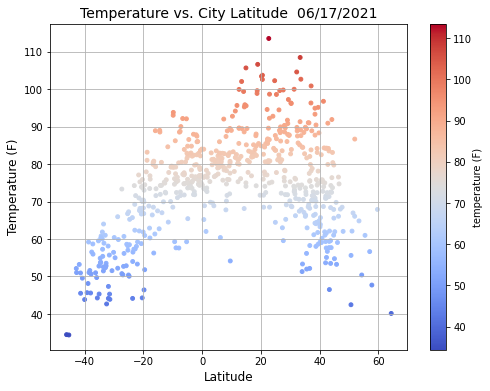

In [7]:
# Plot relationship of Temperature (F) vs. Latitude
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['City_Lat'], city_data_df['Temperature'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title(f'Temperature vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label("temperature (F)", labelpad=+1)
plt.grid()
plt.savefig('Images/temperature-vs-latitude.png')
plt.show()

#### Humidity vs City Latitude:
The code analyzes the relationship between the city latitude and humidity. There doesn't seem to be a discernible pattern.

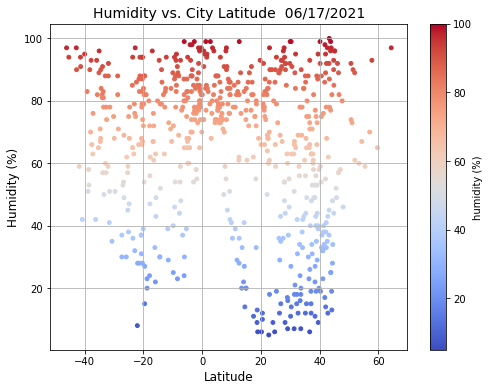

In [8]:
# Plot relationship of Humidity (%) vs. Latitude
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['City_Lat'], city_data_df['Humidity'], 
           c =city_data_df['Humidity'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Humidity vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Humidity (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("humidity (%)", labelpad=+1)
plt.grid(True) # add (True) for test

plt.savefig('Images/humidity-vs-latitude.png')
plt.show()

#### Cloudiness vs City Latitude:
The code analyzes the relationship between the city latitude and cloudiness. There doesn't seem to be a discernible pattern.

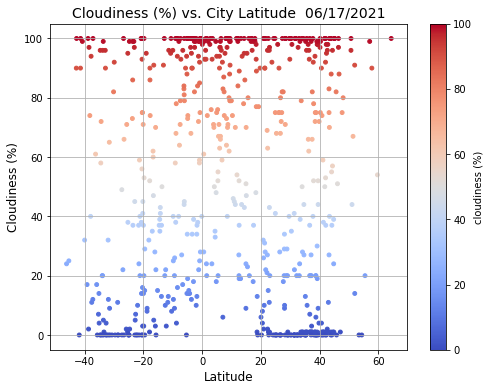

In [9]:
# Plot relationship of Cloudiness (%) vs. Latitude
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['City_Lat'], city_data_df['Cloudiness'], 
           c =city_data_df['Cloudiness'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Cloudiness (%) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("cloudiness (%)", labelpad=+1)
plt.grid() # add (True) for test

plt.savefig('Images/cloudiness-vs-latitude.png')
plt.show()

#### Wind Speed vs. Latitude
The code analyzes the relationship between the city latitude and wind speed. There doesn't seem to be any discernible pattern.

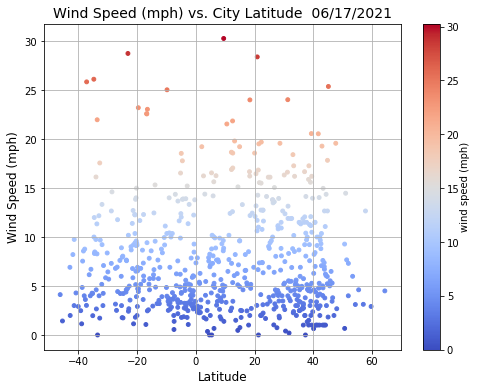

In [10]:
# Plot relationship of Wind Speed (%) vs. Latitude
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['City_Lat'], city_data_df['Wind_Speed'], 
           c =city_data_df['Wind_Speed'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Wind Speed (mph) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("wind speed (mph)", labelpad=+1)
plt.grid()

plt.savefig('Images/wind_speed-vs-latitude.png')
plt.show()

### Linear Regression


In [11]:
# Linear Regression plot function to be called in linear regression plots
def linear_regres(x, y):
    slope, intercept, rvalue, pvalue, stderror = linregress(x, y)
    print(f'R Squared is: {rvalue**2}')
    
    # Print statement executes based on evaluation if rvalue condition is true/false.
    if rvalue <0.0:
        print('R-squared displays a negative correlation')
    elif 0.0 < rvalue < 0.05:
        print('R-squared displays a neutral correlation')
    else:
        print('R-squared displays a positive correlation')
    
    regression_values = slope * x + intercept
    
    # Linear regression equation
    linear_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
                                                          
    # Plot linear regression
    plt.plot(x, regression_values, color='maroon')
    
    # End linear regression function and return results
    return linear_eq

In [12]:
# Create dataframes and dict for N. Hemisphere (latitude >=0) and S. Hemisphere (latitude <0)
northern_df = city_data_df.loc[pd.to_numeric(city_data_df['City_Lat']).astype(float) >= 0, :]
southern_df = city_data_df.loc[pd.to_numeric(city_data_df['City_Lat']).astype(float) < 0, :]

n_latitude = northern_df['City_Lat']
n_temperature = northern_df['Temperature']
n_humidity = northern_df['Humidity']
n_cloudiness = northern_df['Cloudiness']
n_windspeed = northern_df['Wind_Speed']

s_latitude = southern_df['City_Lat']
s_temperature = southern_df['Temperature']
s_humidity = southern_df['Humidity']
s_cloudiness = southern_df['Cloudiness']
s_windspeed = southern_df['Wind_Speed']
# print(n_latitude)  -- test if dict is valid

##### 
##### Northern Hemisphere - Temperature (F) vs. Latitude

R Squared is: 0.1322022804511982
R-squared displays a negative correlation
The regression line shows not much of a correlation between city temperatures and latitude. The R-squared shows that the data points don't fit the line. However, the plot shows somewhat decreasing temperatures the further a city is from the equator, in the Northern Hemisphere.


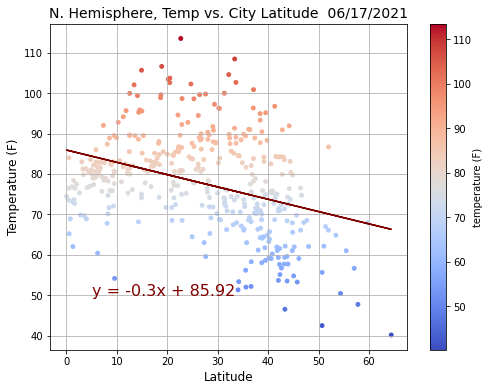

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(n_latitude, n_temperature, 
           c =northern_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
linear_eq = linear_regres(n_latitude, n_temperature)

plt.title(f'N. Hemisphere, Temp vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

plt.annotate(linear_eq,(5,50),fontsize=16, color='maroon')
cbar= plt.colorbar()
cbar.set_label("temperature (F)", labelpad=+1)
plt.grid()
plt.savefig('Images/NH_lin_regres_temp-vs-lat.png')
print("The regression line shows not much of a correlation between city temperatures and latitude. The R-squared shows that the data points don't fit the line. However, the plot shows somewhat decreasing temperatures the further a city is from the equator, in the Northern Hemisphere.")
plt.show()

##### 
##### Southern Hemisphere - Temperature (F) vs. Latitude

R Squared is: 0.6510076067478431
R-squared displays a positive correlation
In the Southern Hemisphere, the regression line shows a stronger correlation than the Northern Hemisphere, with city temperatures increasing the closer they are to the equator. The R-squared value, at 55% shows there is a relationship.


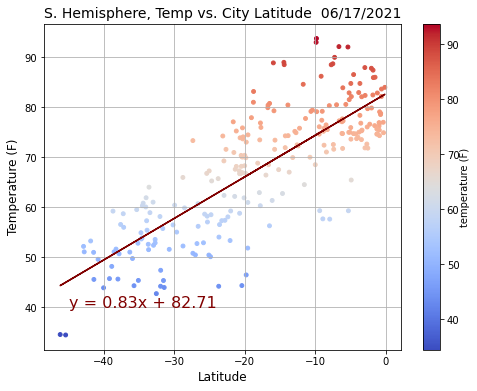

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(s_latitude, s_temperature, 
           c =southern_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
linear_eq = linear_regres(s_latitude, s_temperature)

plt.title(f'S. Hemisphere, Temp vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Annotate linear regression equation on plot
plt.annotate(linear_eq,(-45,40),fontsize=16, color='maroon')

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label('temperature (F)', labelpad=+1)
plt.grid()
plt.savefig('Images/SH_lin_regres_temp-vs-lat.png')
print('In the Southern Hemisphere, the regression line shows a stronger correlation than the Northern Hemisphere, with city temperatures increasing the closer they are to the equator. The R-squared value, at 55% shows there is a relationship.')
plt.show()

#####  
##### Northern Hemisphere - Humidity (%) vs. Latitude

R Squared is: 0.051285466325009584
R-squared displays a negative correlation
The regression line shows that there is a small relationship between humidity and city latitude. The further away from the equatorial line, the less humid it is


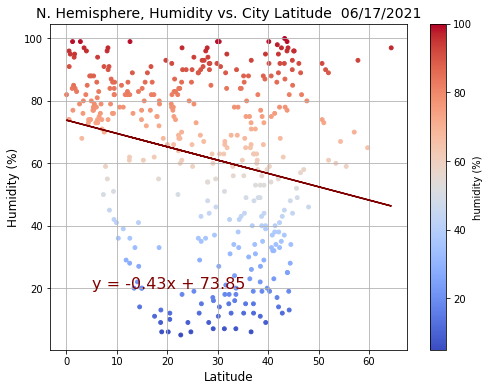

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(n_latitude, n_humidity, 
           c =northern_df['Humidity'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
linear_eq = linear_regres(n_latitude, n_humidity)

plt.title(f'N. Hemisphere, Humidity vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Humidity (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)


plt.annotate(linear_eq,(5,20),fontsize=16, color='maroon')
cbar= plt.colorbar()
cbar.set_label('humidity (%)', labelpad=+1)
plt.grid()
plt.savefig('Images/NH_lin_regres_humidity-vs-lat.png')
print('The regression line shows that there is a small relationship between humidity and city latitude. The further away from the equatorial line, the less humid it is')
plt.show()

##### 
##### Southern Hemisphere - Humidity (%) vs. Latitude

R Squared is: 0.006249093927241505
R-squared displays a positive correlation
The regression line shows that there is no relationship between humidity and latitude.


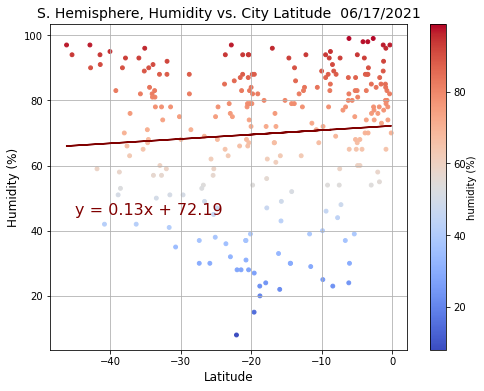

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(s_latitude, s_humidity, 
           c =southern_df['Humidity'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
linear_eq = linear_regres(s_latitude, s_humidity)

plt.title(f'S. Hemisphere, Humidity vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Humidity (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

plt.annotate(linear_eq,(-45,45),fontsize=16, color='maroon')
cbar= plt.colorbar()
cbar.set_label('humidity (%)', labelpad=+1)
plt.grid()
plt.savefig('Images/SH_lin_regres_humidity-vs-lat.png')
print('The regression line shows that there is no relationship between humidity and latitude.')
plt.show()

##### 
##### Northern Hemisphere - Cloudiness (%) vs. Latitude

R Squared is: 0.054107869274749816
R-squared displays a negative correlation
The regression line shows that the further cities are from the equator, the less cloudy it is. R-square also shows that there is a correleation, at 52%.


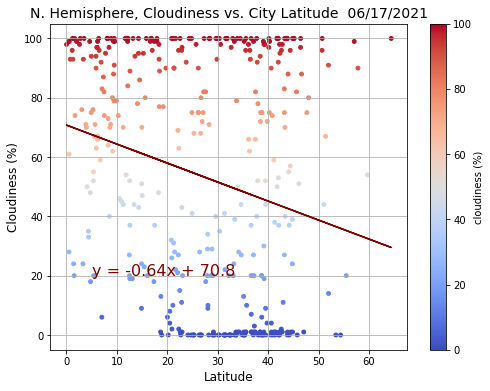

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(n_latitude, n_cloudiness, 
           c =northern_df['Cloudiness'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
linear_eq = linear_regres(n_latitude, n_cloudiness)

plt.title(f'N. Hemisphere, Cloudiness vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

plt.annotate(linear_eq,(5,20),fontsize=16, color='maroon')
cbar= plt.colorbar()
cbar.set_label('cloudiness (%)', labelpad=+1)
plt.grid()
plt.savefig('Images/NH_lin_regres_cloudiness-vs-lat.png')
print('The regression line shows that the further cities are from the equator, the less cloudy it is. R-square also shows that there is a correleation, at 52%.')
plt.show()

#### 
##### Southern Hemisphere - Cloudiness (%) vs. Latitude

R Squared is: 0.06862764268529863
R-squared displays a positive correlation
The regression line shows that there is no relationship between cloudiness and latitude.


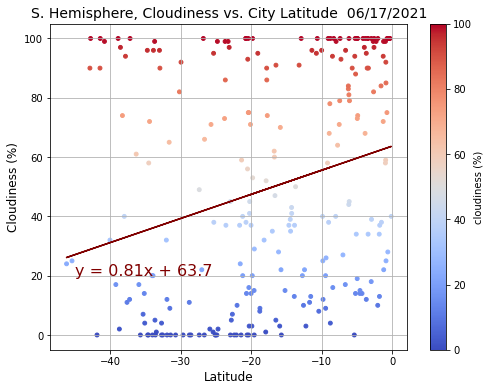

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(s_latitude, s_cloudiness, 
           c =southern_df['Cloudiness'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
linear_eq = linear_regres(s_latitude, s_cloudiness)

plt.title(f'S. Hemisphere, Cloudiness vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

plt.annotate(linear_eq,(-45,20),fontsize=16, color='maroon')
cbar= plt.colorbar()
cbar.set_label('cloudiness (%)', labelpad=+1)
plt.grid()
plt.savefig('Images/SH_lin_regres_cloudiness-vs-lat.png')
print('The regression line shows that there is no relationship between cloudiness and latitude.')
plt.show()

##### 
##### Northern Hemisphere - Wind Speed (mph) vs. Latitude

R Squared is: 0.0006609310724936908
R-squared displays a negative correlation
The regression line does not show a decernible relationship between wind speed and city latitude in the Southern Hemisphere.


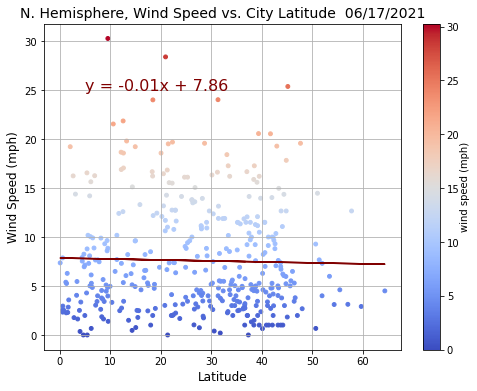

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(n_latitude, n_windspeed, 
           c =northern_df['Wind_Speed'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
linear_eq = linear_regres(n_latitude, n_windspeed)

plt.title(f'N. Hemisphere, Wind Speed vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

plt.annotate(linear_eq,(5,25),fontsize=16, color='maroon')
cbar= plt.colorbar()
cbar.set_label('wind speed (mph)', labelpad=+1)
plt.grid()
plt.savefig('Images/NH_lin_regres_wind_speed-vs-lat.png')
print('The regression line does not show a decernible relationship between wind speed and city latitude in the Southern Hemisphere.')
plt.show()

##### 
##### Southern Hemisphere - Wind Speed (mph) vs. Latitude

R Squared is: 0.00410018547949977
R-squared displays a negative correlation
The regression line shows no relationship between wind speed and city latitude and R-squared of zero supports shows relationship.


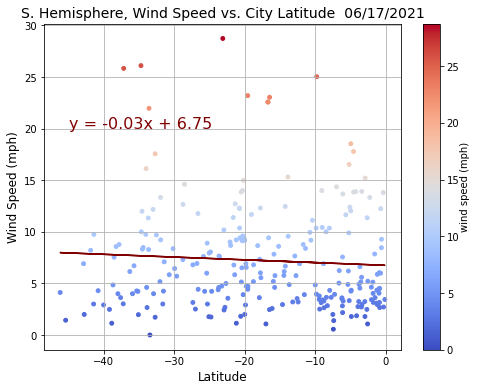

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(s_latitude, s_windspeed, 
           c =southern_df['Wind_Speed'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
linear_eq = linear_regres(s_latitude, s_windspeed)

plt.title(f'S. Hemisphere, Wind Speed vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

plt.annotate(linear_eq,(-45,20),fontsize=16, color='maroon')
cbar= plt.colorbar()
cbar.set_label('wind speed (mph)', labelpad=+1)
plt.grid()
plt.savefig('Images/SH_lin_regres_wind_speed-vs-lat.png')
print('The regression line shows no relationship between wind speed and city latitude and R-squared of zero supports shows relationship.')
plt.show()